In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import numpy as np
from matplotlib import cm
from matplotlib.colors import Normalize

In [3]:
def format_ticks(y, _):
        # Format with 2 decimals
        s = f'{y:.3f}'
        # Remove trailing zeros and dot if needed
        if '.' in s:
            s = s.rstrip('0').rstrip('.')
        # Remove leading zero before decimal point
        if s.startswith('0.') or s.startswith('-0.'):
            s = s.replace('0.', '.')
        return s

AttributeError: module 'matplotlib.cm' has no attribute 'rocket'

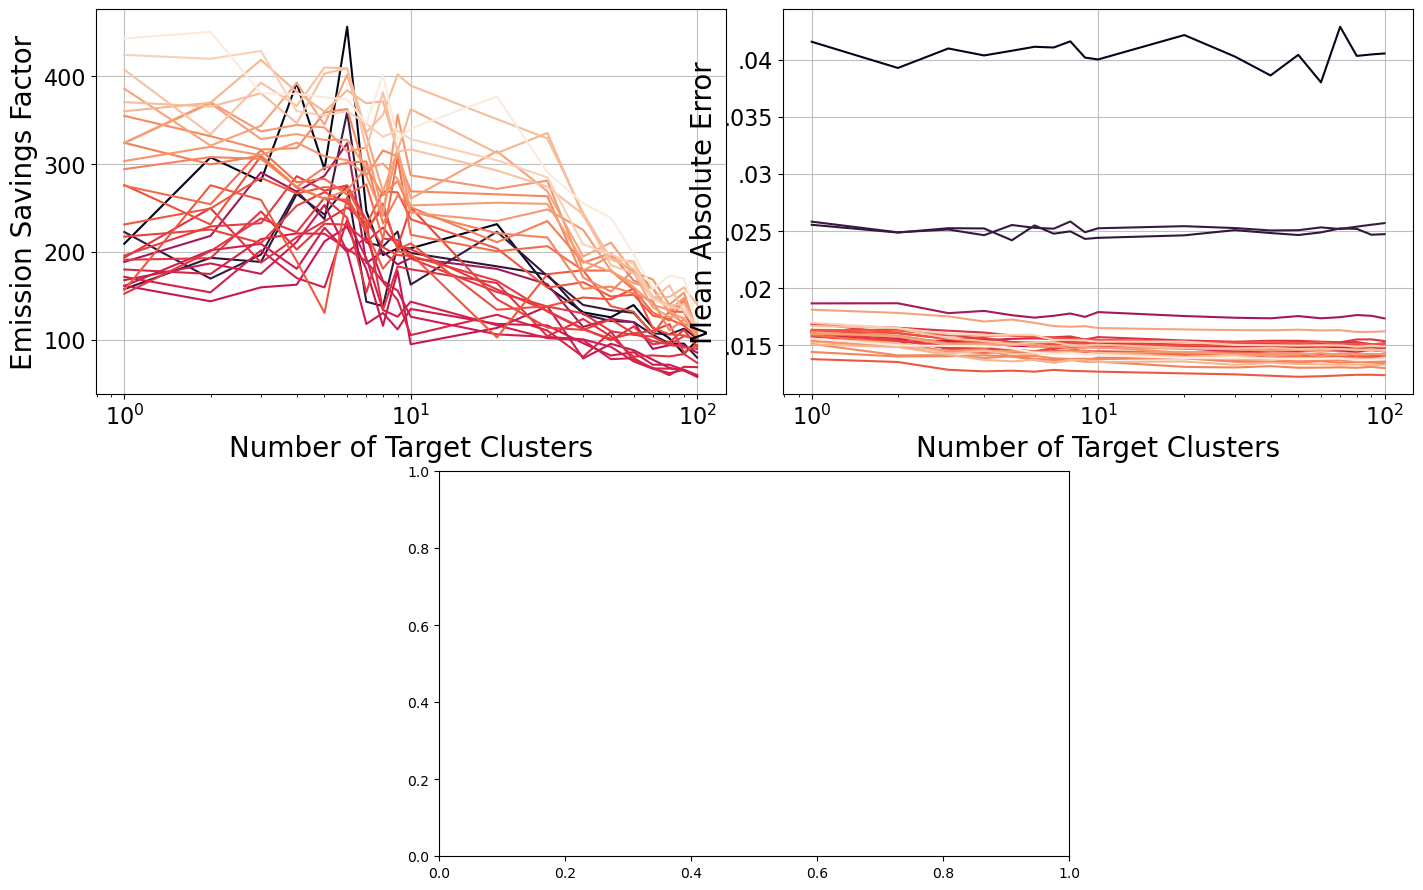

In [4]:
def plot_supplement_random_target_results(results_path : str):
    # Load results df.
    results_df = pd.read_csv(results_path)
    results_df['num_samples_log'] = np.log(results_df["num_samples"])
    results_df['total_runtime'] = results_df['total_runtime']/3600.0
    results_df['abs_time_saving'] = results_df['abs_time_saving']/3600.0
    tissues_df = results_df[results_df['num_non_tfs']==100]
    tissues_df = tissues_df.sort_values(by='num_samples', ascending=False)
    
    # Create one large mosaic plot.
    fig, axs = plt.subplot_mosaic([['A', 'A', 'B', 'B'], ['.', 'C', 'C', '.']])
    fig.set_size_inches(17, 11)
    axs_list = list(axs.values())
    label_fontsize = 20
    
    sns.lineplot(data=results_df, x='num_non_tfs', y='rel_emission_saving', hue="num_samples_log", ax=axs['A'], legend=False, palette="rocket")
    axs['A'].set_xlabel('Number of Target Clusters', fontsize=label_fontsize)
    axs['A'].set_ylabel('Emission Savings Factor', fontsize=label_fontsize)
    axs['A'].tick_params(axis='x', labelsize=label_fontsize-4)
    axs['A'].tick_params(axis='y', labelsize=label_fontsize-4)
    formatter = FuncFormatter(format_ticks)
    axs['A'].yaxis.set_major_formatter(formatter)
    axs['A'].grid(True, alpha=0.8)
    axs['A'].set_xscale('log')

    
    sns.lineplot(data=results_df, x='num_non_tfs', y='mae', ax=axs['B'], hue="num_samples_log", legend=False, palette="rocket")
    #axs['B'].set_title('Significance Level of 0.01', fontsize=label_fontsize)
    axs['B'].set_xlabel('Number of Target Clusters', fontsize=label_fontsize)
    axs['B'].set_ylabel('Mean Absolute Error', fontsize=label_fontsize)
    axs['B'].tick_params(axis='x', labelsize=label_fontsize-4)
    axs['B'].tick_params(axis='y', labelsize=label_fontsize-4)
    formatter = FuncFormatter(format_ticks)
    # Apply to y-axis
    axs['B'].yaxis.set_major_formatter(formatter)
    axs['B'].grid(True, alpha=0.8)
    axs['B'].set_xscale('log')
    
    norm = Normalize(vmin=tissues_df['num_samples_log'].min(), vmax=tissues_df['num_samples_log'].max())
    colors = cm.rocket(norm(tissues_df['num_samples_log']))
    sns.barplot(data=tissues_df, x='num_samples', y='tissue', ax=axs['C'], palette=colors)
    axs['C'].set_xlabel('Number of Samples', fontsize=label_fontsize)
    axs['C'].set_ylabel('Tissue', fontsize=label_fontsize)
    axs['C'].tick_params(axis='x', labelsize=label_fontsize-4)
    #axs['C'].tick_params(axis='y', labelsize=label_fontsize-4)
    axs['C'].grid(True,axis='x', linestyle='--')
    
    labels = {'A': 'A', 'B': 'B', 'C': 'C'}

    for key, label in labels.items():
        ax = axs[key]
        ax.text(
            -0.1, 1.1, label,  # x, y (in axes fraction coords)
            transform=ax.transAxes,
            fontsize=30,
            fontweight='bold',
            va='top',
            ha='left'
        )
    
    fig.tight_layout()
    fig.subplots_adjust(hspace=0.4, wspace=0.3)
    #plt.show()
    plt.savefig("supplement_random_targets_wasserstein_all_tissues.pdf", format='pdf')
    
results_path = "../../results/manuscript/random_targets_wasserstein_all_tissues_with_samples.csv"
plot_supplement_random_target_results(results_path)